In [12]:
#Calculate the mass of the surface plate
import numpy as np

h = 50/1000 #Height of surface plate
D = 600/1000 #Diameter of surface plate
t_steel = 5/1000 #Thickness of steel

rho_steel = 7500 #Density of steel
rho_rubber = 1100 #Density of rubber

v_total = (D/2)**2 * np.pi * h
v_rubber = (h-t_steel) * np.pi * ((D - 2*t_steel)**2)/4  
v_steel = v_total - v_rubber

m_steel = rho_steel * v_steel
m_rubber = rho_rubber * v_rubber
m_surface = m_rubber + m_steel #mass of surface plate 

print("The total mass of the surface plate is", m_surface,"kg")

The total mass of the surface plate is 27.290387063203838 kg


In [17]:
#Calculate the reqired spring constant

#Calculate the force due to the weight of the child and the surface plate
m_child = 30 #mass of child

m_total  = m_child + m_surface

f_total = m_total * 9.81 #Total force

x_max = 30/100 #maximum displacement of surface plate

#f = -kx
#Calculate the spring constant required to ensure the surface plate is easily depresable
k = -f_total/x_max

x_min = (m_surface * 9.81)/k
print("The required spring constant is", -k,"N/m")
print("The surface plate will be compressed by", x_min, "m, when the plate is not occupied")


The required spring constant is 1382.8956569667657 N/m
The surface plate will be compressed by -0.19359283959083515 m, when the plate is not occupied


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


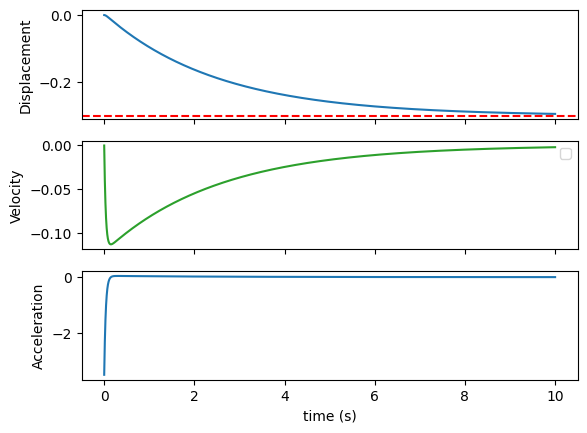

-0.0003479601566902321


In [86]:
#Calculate the required dampering constant
import matplotlib.pyplot as plt

m_adult_max = 15 #maximum rated mass of adult kg

v_y = 0
c_d = 1250#750
s_y = 0
k = 490.501

runTime = 10
timeStep = 0.0001

tout = [] 
a_yout = []
v_yout = []
s_yout = []



for t in np.arange(0, runTime, timeStep):
    F_d = -c_d * v_y
    F_g = (m_adult_max + m_surface) * -9.81
    F_s = -k * s_y + 267.715

    
    f_total = F_d + F_g + F_s
    


    if s_y <= -x_max:
        s_y = -x_max
        v_y = -0.99*v_y
    
    else:
        a_y = f_total/(m_surface + m_adult_max)
        v_y = v_y + a_y * timeStep
        s_y = s_y + v_y * timeStep



    tout.append(t)
    a_yout.append(a_y)
    v_yout.append(v_y)
    s_yout.append(s_y)


fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].plot(tout, s_yout)
axs[0].set(xlabel='time (s)', ylabel='Displacement')
axs[0].axhline(y=-x_max, color='r', linestyle='--', label='Max displacement')

axs[1].plot(tout, v_yout, 'tab:green')
axs[1].set(xlabel='time (s)', ylabel='Velocity')

axs[2].plot(tout, a_yout, 'tab:blue')
axs[2].set(xlabel='time (s)', ylabel='Acceleration')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Add a legend to the second subplot (axs[1]) to label the horizontal line.
axs[1].legend()

plt.show()

print(max(v_yout))

In [82]:
#Calculate the required dampering constant
import matplotlib.pyplot as plt


max_v_all = []
cd_all = []
for c_d in np.arange(0,5000,10):
    m_adult_max = 150 #maximum rated mass of adult kg

    v_y = 0
    s_y = 0
    k = 490.501

    runTime = 10
    timeStep = 0.0001

    tout = [] 
    a_yout = []
    v_yout = []
    s_yout = []



    for t in np.arange(0, runTime, timeStep):
        F_d = -c_d * v_y
        F_g = (m_adult_max + m_surface) * -9.81
        F_s = -k * s_y + 267.715

        
        f_total = F_d + F_g + F_s
        


        if s_y <= -x_max:
            s_y = -x_max
            v_y = -0.99*v_y
        
        else:
            a_y = f_total/(m_surface + m_adult_max)
            v_y = v_y + a_y * timeStep
            s_y = s_y + v_y * timeStep



        tout.append(t)
        a_yout.append(a_y)
        v_yout.append(v_y)
        s_yout.append(s_y)

    max_v_all.append(max(v_yout))
    cd_all.append(c_d)


plt.plot(cd_all, max_v_all)
plt.xlabel("damping coefficient")
plt.ylabel("Impact velocity(m/s)")
plt.grid()
plt.grid(which = "minor")
plt.minorticks_on()
plt.title("Impact velocity(m/s) for 150kg")
plt.show()

KeyboardInterrupt: 

<class 'list'>


Text(0.5, 1.0, 'Max pressure at different weights')

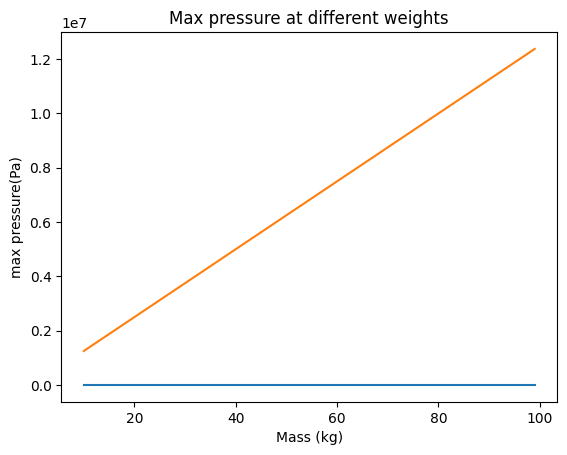

In [59]:
#Calculate plot pumping capacity at different weights

D_pump = 10/1000
A_pump = (D_pump/2)**2 * np.pi
v_pumped = []

for displacement in displacements:
    v_pumped.append(displacement * A_pump)


plt.plot(masses, v_pumped)
plt.xlabel("Mass (kg)")
plt.ylabel("Volume per pump (m^3)")
plt.title("Pumping capacity at different weights")

#Calculate max pressure producable for different weights

p_max_pumped = []
for mass in masses:
    p_max_pumped.append(mass*9.81/A_pump)

print(type(p_max_pumped))
plt.plot(masses, p_max_pumped)
plt.xlabel("Mass (kg)")
plt.ylabel("max pressure(Pa)")
plt.title("Max pressure at different weights")
